In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pyqg
from PIL import Image
from pyqg import diagnostic_tools as tools
from collections import OrderedDict

/Users/dtamayo/Documents/workspace/pyqg/pyqg/model.py:8: UserWarning: No pyfftw detected. Using numpy.fft
  from .kernel import PseudoSpectralKernel, tendency_forward_euler, tendency_ab2, tendency_ab3


In [2]:
def splitmosaic(pix, res=128):
    N1 = pix.shape[0]/res
    N2 = pix.shape[1]/res
    return [pix[res*i:res*(i+1), res*j:res*(j+1)].reshape(1, res, res).astype(float) for i in range(N1) for j in range(N2)]

In [3]:
res = 128 # resolution of images

In [4]:
pic = Image.open("reals.png")
pix = np.array(pic)
reals = splitmosaic(pix, res)

In [5]:
pic = Image.open("fakes007813.png")
pix = np.array(pic)
fakes = splitmosaic(pix, res)

In [6]:
%%time
E, energy, enstrophy, kr, energy_iso, enstrophy_iso, Ef, energyf, enstrophyf, krf, energy_isof, enstrophy_isof = [], [], [], [], [], [], [], [], [], [], [], []
for real in reals:
    m = pyqg.BTModel(L=2.*np.pi, nx=128, beta=0., H=1., rek=0., rd=None, tmax=0.01, dt=0.001, taveint=0.001, ntd=1)
    m.set_q(real)
    m.run()
    E.append(m._calc_ke())
    energy.append(m.get_diagnostic('KEspec'))
    enstrophy.append(m.get_diagnostic('Ensspec'))
    _kr, _energy_iso = tools.calc_ispec(m,energy[-1].squeeze())
    kr.append(_kr)
    energy_iso.append(_energy_iso)
    _, _enstrophy_iso = tools.calc_ispec(m,enstrophy[-1].squeeze())
    enstrophy_iso.append(_enstrophy_iso)
for fake in fakes:
    m = pyqg.BTModel(L=2.*np.pi, nx=128, beta=0., H=1., rek=0., rd=None, tmax=0.01, dt=0.001, taveint=0.001, ntd=1)
    m.set_q(fake)
    m.run()
    Ef.append(m._calc_ke())
    energyf.append(m.get_diagnostic('KEspec'))
    enstrophyf.append(m.get_diagnostic('Ensspec'))
    _krf, _energy_isof = tools.calc_ispec(m,energyf[-1].squeeze())
    krf.append(_krf)
    energy_isof.append(_energy_isof)
    _, _enstrophy_isof = tools.calc_ispec(m,enstrophyf[-1].squeeze())
    enstrophy_isof.append(_enstrophy_isof)

INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logge

CPU times: user 48.7 s, sys: 932 ms, total: 49.6 s
Wall time: 8.35 s


# 1 line for each real (blue) and fake (red) image in mosaic

Text(0.5,1,'Energy Spectrum')

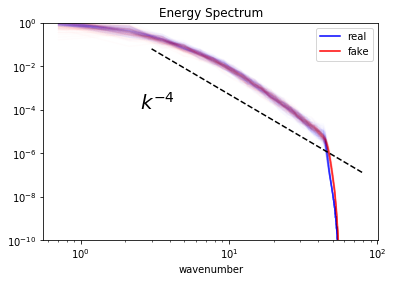

In [7]:
fig, ax = plt.subplots()
ks = np.array([3.,80])
es = 5*ks**-4
for i in range(len(kr)):
    ax.loglog(kr[i],energy_iso[i], c='b', alpha=0.01, label='real')
for i in range(len(krf)):
    ax.loglog(krf[i],energy_isof[i], c='r', alpha=0.01, label='fake')
ax.loglog(ks,es,'k--')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
leg=plt.legend(by_label.values(), by_label.keys())
for l in leg.get_lines():
    l.set_alpha(1)
ax.text(2.5,.0001,r'$k^{-4}$',fontsize=20)
ax.set_ylim([1.e-10,1.e0])
ax.set_xlabel('wavenumber')
ax.set_title('Energy Spectrum')

# Same for enstrophy spectrum

Text(0.5,1,'Enstrophy Spectrum')

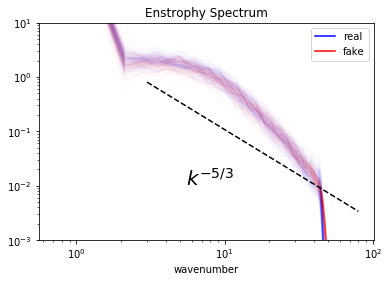

In [8]:
fig, ax = plt.subplots()
ks = np.array([3.,80])
es = 5*ks**(-5./3)
for i in range(len(kr)):
    ax.loglog(kr[i],enstrophy_iso[i], c='b', alpha=0.01, label='real')
for i in range(len(krf)):
    ax.loglog(krf[i],enstrophy_isof[i], c='r', alpha=0.01, label='fake')
ax.loglog(ks,es,'k--')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
leg=plt.legend(by_label.values(), by_label.keys())
for l in leg.get_lines():
    l.set_alpha(1)
ax.text(5.5,.01,r'$k^{-5/3}$',fontsize=20)
ax.set_ylim([1.e-3,1.e1])
ax.set_xlabel('wavenumber')
ax.set_title('Enstrophy Spectrum')

# Test time evolution

In [9]:
# define a quick function for plotting and visualize the initial condition
def plot_q(m, qmin=0, qmax=255):
    fig, ax = plt.subplots()
    pc = ax.pcolormesh(m.x,m.y,m.q.squeeze(), cmap='RdBu_r')
    pc.set_clim([qmin, qmax])
    ax.set_xlim([0, 2*np.pi])
    ax.set_ylim([0, 2*np.pi]);
    ax.set_aspect(1)
    plt.colorbar(pc)
    plt.title('Time = %g' % m.t)
    plt.show()

INFO:  Logger initialized


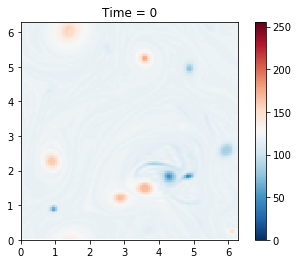

CPU times: user 1.14 s, sys: 24.1 ms, total: 1.17 s
Wall time: 210 ms


In [10]:
%%time
m = pyqg.BTModel(L=2.*np.pi, nx=128, beta=0., H=1., rek=0., rd=None, tmax=0.01, dt=0.001, taveint=0.001, ntd=1)
m.set_q(reals[0])
plot_q(m)

In [11]:
m.run()
KE0 = m._calc_ke()
PE0 = (m.q**2).sum()

Nout = 1000
tmax = 10
times = np.linspace(m.t, tmax, Nout)
KE = np.zeros(Nout)
PE = np.zeros(Nout)
for i, time in enumerate(times):
    m.tmax = time
    m.run()
    KE[i] = m._calc_ke()
    PE[i] = (m.q**2).sum()

INFO: Step: 1000, Time: 1.00e+00, KE: 2.55e+00, CFL: 0.134
INFO: Step: 2000, Time: 2.00e+00, KE: 2.55e+00, CFL: 0.132
INFO: Step: 3000, Time: 3.00e+00, KE: 2.55e+00, CFL: 0.119
INFO: Step: 4000, Time: 4.00e+00, KE: 2.55e+00, CFL: 0.125
INFO: Step: 5000, Time: 5.00e+00, KE: 2.55e+00, CFL: 0.100
INFO: Step: 6000, Time: 6.00e+00, KE: 2.54e+00, CFL: 0.111
INFO: Step: 7000, Time: 7.00e+00, KE: 2.54e+00, CFL: 0.108
INFO: Step: 8000, Time: 8.00e+00, KE: 2.54e+00, CFL: 0.105
INFO: Step: 9000, Time: 9.00e+00, KE: 2.54e+00, CFL: 0.118
INFO: Step: 10000, Time: 1.00e+01, KE: 2.54e+00, CFL: 0.119


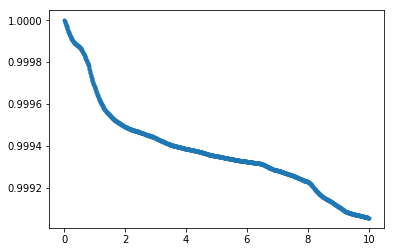

In [12]:
fig, ax = plt.subplots()
ax.plot(times, KE/KE0, '.')

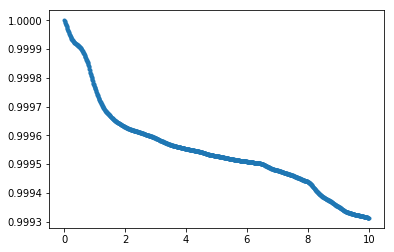

In [13]:
fig, ax = plt.subplots()
ax.plot(times, PE/PE0, '.')

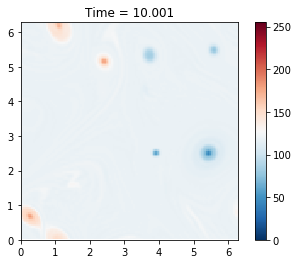

In [14]:
plot_q(m)

INFO:  Logger initialized


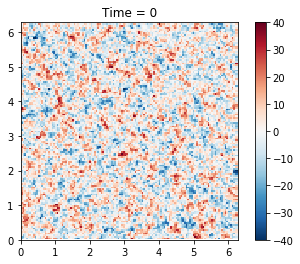

In [15]:
# generate McWilliams 84 IC condition
m = pyqg.BTModel(L=2.*np.pi, nx=128, beta=0., H=1., rek=0., rd=None, tmax=0.01, dt=0.001, taveint=0.001, ntd=1)
fk = m.wv != 0
ckappa = np.zeros_like(m.wv2)
ckappa[fk] = np.sqrt( m.wv2[fk]*(1. + (m.wv2[fk]/36.)**2) )**-1

nhx,nhy = m.wv2.shape

Pi_hat = np.random.randn(nhx,nhy)*ckappa +1j*np.random.randn(nhx,nhy)*ckappa

Pi = m.ifft( Pi_hat[np.newaxis,:,:] )
Pi = Pi - Pi.mean()
Pi_hat = m.fft( Pi )
KEaux = m.spec_var( m.wv*Pi_hat )

pih = ( Pi_hat/np.sqrt(KEaux) )
qih = -m.wv2*pih
qi = m.ifft(qih)
m.set_q(qi)
plot_q(m, qmin=-40, qmax=40)

In [16]:
%%time
m.run()
KE0 = m._calc_ke()
PE0 = (m.q**2).sum()

Nout = 1000
tmax = 10
times = np.linspace(m.t, tmax, Nout)
KE = np.zeros(Nout)
PE = np.zeros(Nout)
for i, time in enumerate(times):
    m.tmax = time
    m.run()
    KE[i] = m._calc_ke()
    PE[i] = (m.q**2).sum()

INFO: Step: 1000, Time: 1.00e+00, KE: 4.87e-01, CFL: 0.060
INFO: Step: 2000, Time: 2.00e+00, KE: 4.82e-01, CFL: 0.059
INFO: Step: 3000, Time: 3.00e+00, KE: 4.79e-01, CFL: 0.058
INFO: Step: 4000, Time: 4.00e+00, KE: 4.77e-01, CFL: 0.049
INFO: Step: 5000, Time: 5.00e+00, KE: 4.76e-01, CFL: 0.048
INFO: Step: 6000, Time: 6.00e+00, KE: 4.75e-01, CFL: 0.058
INFO: Step: 7000, Time: 7.00e+00, KE: 4.75e-01, CFL: 0.049
INFO: Step: 8000, Time: 8.00e+00, KE: 4.74e-01, CFL: 0.046
INFO: Step: 9000, Time: 9.00e+00, KE: 4.74e-01, CFL: 0.051
INFO: Step: 10000, Time: 1.00e+01, KE: 4.73e-01, CFL: 0.052


CPU times: user 2min 4s, sys: 743 ms, total: 2min 5s
Wall time: 20.9 s


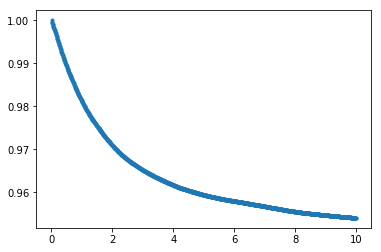

In [17]:
fig, ax = plt.subplots()
ax.plot(times, KE/KE0, '.')

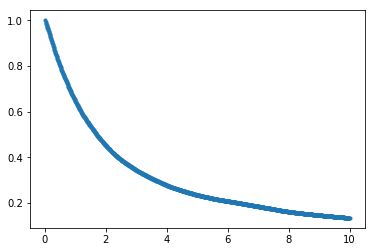

In [18]:
fig, ax = plt.subplots()
ax.plot(times, PE/PE0, '.')

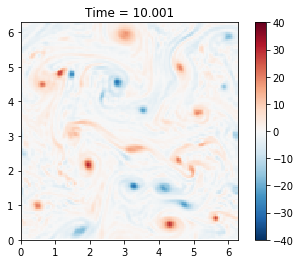

In [19]:
plot_q(m, qmin=-40, qmax=40)